In [60]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
from IPython.display import clear_output

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle

import scoobi
from scoobi.math_module import xp, _scipy, ensure_np_array
from scoobi.imshows import imshow1, imshow2, imshow3
import scoobi.scoobi as scoobi
import scoobi.utils as utils

import lina

import time


In [67]:
time.sleep(10)

In [68]:
iefc_data = utils.load_pickle(f'../data/llowfsc+iefc/{20241216}_iefc_run_180_1.pkl')

camsci_data_1 = utils.load_pickle(f'../data/llowfsc+iefc/{20241216}_camsci_stream_1.pkl')
camsci_data_2 = utils.load_pickle(f'../data/llowfsc+iefc/{20241216}_camsci_stream_2.pkl')



In [ ]:
iefc_ims.shape, iefc_contrast.shape
# iefc_ims[:, control_mask].shape

((31, 150, 150), (31,))

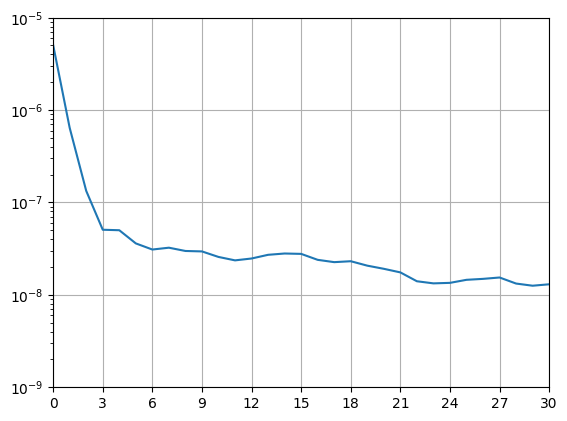

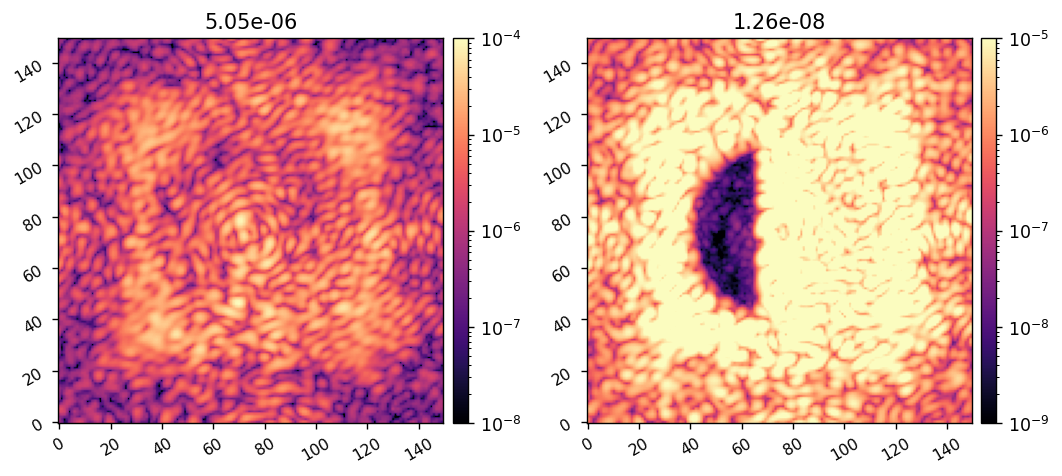

In [75]:
iefc_ims = xp.array(iefc_data['images'])
control_mask = iefc_data['control_mask_2']

iefc_contrasts = xp.mean(iefc_ims[:, control_mask], axis=1)

ref_contrast = iefc_contrasts[0]
ref_im = iefc_ims[0]

best_itr = xp.argmin(iefc_contrasts)
best_contrast = iefc_contrasts[best_itr]
best_im = iefc_ims[best_itr]

itrs = np.linspace(0, iefc_ims.shape[0]-1,  iefc_ims.shape[0])
plt.semilogy(itrs, ensure_np_array(iefc_contrasts))
plt.xticks(itrs[::3])
plt.xlim([0, iefc_ims.shape[0]-1])
plt.ylim([1e-9, 1e-5])
plt.grid()
plt.show()

imshow2(
    ref_im, best_im, 
    f'{ref_contrast:.2e}', f'{best_contrast:.2e}',
    lognorm=True, 
    vmin1=1e-8, vmin2=1e-9, vmax1=1e-4, vmax2=1e-5,
)



In [ ]:
mean_im = xp.mean(camsci_ims_1, axis=0)

In [53]:
np.linspace(0, camsci_data_1['duration'], 13)


array([   0.,  150.,  300.,  450.,  600.,  750.,  900., 1050., 1200.,
       1350., 1500., 1650., 1800.])

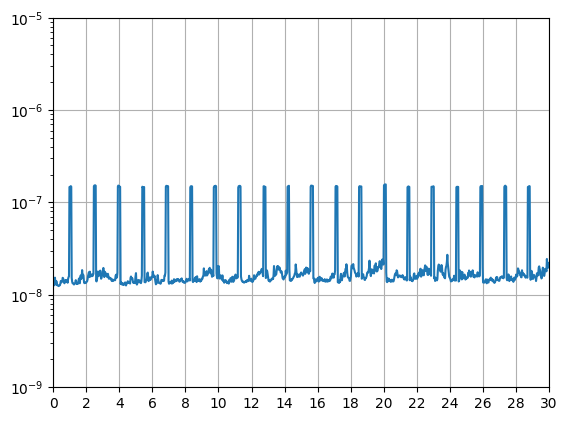

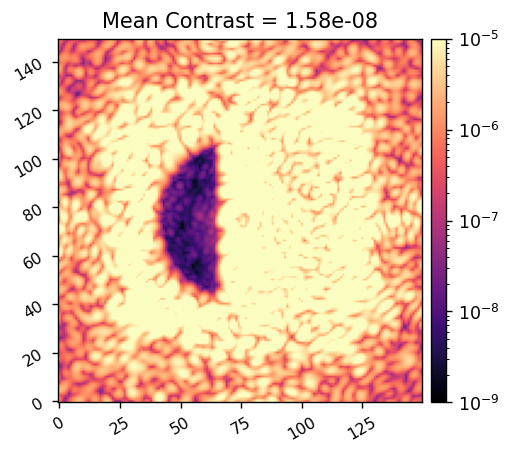

In [59]:
camsci_ims_1 = camsci_data_1['camsci_ims']
contrasts_1 = xp.mean(camsci_ims_1[:, camsci_data_1['control_mask']], axis=1)
Nims = camsci_ims_1.shape[0]
times = np.linspace(0, camsci_data_1['duration']/60, Nims)
time_ticks = np.linspace(0, camsci_data_1['duration']/60, 16)

plt.semilogy(times, ensure_np_array(contrasts_1))
plt.xticks(time_ticks)
plt.xlim([0, camsci_data_1['duration']/60])
plt.ylim([1e-9, 1e-5])
plt.grid()
plt.show()

unprobed_ims_1 = camsci_ims_1[contrasts_1<5e-8]

# mean_im_1 = xp.mean(camsci_ims_1, axis=0)
mean_im_1 = xp.mean(unprobed_ims_1, axis=0)

mean_contrast = xp.mean(mean_im_1[camsci_data_1['control_mask']])
imshow1(
    mean_im_1, 
    f'Mean Contrast = {mean_contrast:.2e}',
    lognorm=True, vmin=1e-9, vmax=1e-5,
)
